## **CIND820 - Capstone Project**



# **Investigate Airline passenger satisfaction using Machine Learning Techniques**


# **Preparation:**

In [ ]:
# check python version
! python -V

Python 3.10.12


In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install mlxtend

In [ ]:
!pip install --upgrade ipykernel

In [ ]:
pip install tabulate

In [1]:
# Importing required libraries

import pandas as pd

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

from sklearn.preprocessing import MinMaxScaler
import sklearn.feature_selection as fs
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
import sklearn.feature_selection as fs

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from tabulate import tabulate

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
# from xgboost import XGBClassifier

import sklearn
import time
from resource import getrusage, RUSAGE_SELF
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns.fpgrowth import fpgrowth
from mlxtend.frequent_patterns import fpgrowth

import warnings
warnings.filterwarnings("ignore")

Import csv file (the dataset and the data dictionary)



In [ ]:
# Import the dataset
# Use first column "ID" as Index by using index_col=0

url = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/airline_passenger_satisfaction.csv'
df1 = pd.read_csv(url, index_col=0)
df1.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# Import the dictionary

url2 = 'https://raw.githubusercontent.com/HitomiMo/CIND820_Capstone-Project/main/data_dictionary.csv'
data_dictionary = pd.read_csv(url2, index_col=0)
data_dictionary

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


## **Data preparation for Association Rules**

In [ ]:
df1.shape

(129880, 23)

In [ ]:
# Checking % of missing values
percent_missing = df1['Arrival Delay'].isnull().sum() * 100 / len(df1['Arrival Delay'])
percent_missing

0.3025870033877425

In [ ]:
# Missing value ratio is only 0.3%. Therefore, I will remove missing values before splitting dataset
AR_df = df1.copy()
AR_df = AR_df.dropna(how='any',axis=0)
AR_df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [ ]:
# check the # of entries after removing missing values
row_count = len(AR_df.index)
row_count

129487

**Apply Quantile-cut (qcut) for Age, Flight Distance, Departure Delay and Arrival Delay.**

In [ ]:
AR_df['Age_qcut'] = pd.qcut(AR_df.Age, q=5)
AR_df['Age_qcut'].head()

ID
1    (44.0, 54.0]
2    (25.0, 36.0]
3    (36.0, 44.0]
4    (44.0, 54.0]
5    (44.0, 54.0]
Name: Age_qcut, dtype: category
Categories (5, interval[float64, right]): [(6.999, 25.0] < (25.0, 36.0] < (36.0, 44.0] <
                                           (44.0, 54.0] < (54.0, 85.0]]

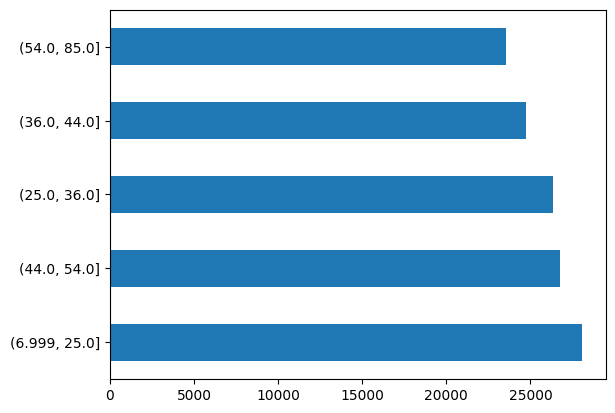

(6.999, 25.0]    28089
(44.0, 54.0]     26757
(25.0, 36.0]     26346
(36.0, 44.0]     24757
(54.0, 85.0]     23538
Name: Age, dtype: int64

In [ ]:
AR_df['Age_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df.Age, q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
AR_df['Flight Distance_qcut'] = pd.qcut(AR_df["Flight Distance"], q=5)
AR_df['Flight Distance_qcut'].head()

ID
1     (631.0, 1050.0]
2     (631.0, 1050.0]
3     (631.0, 1050.0]
4    (1050.0, 2072.0]
5    (2072.0, 4983.0]
Name: Flight Distance_qcut, dtype: category
Categories (5, interval[float64, right]): [(30.999, 358.0] < (358.0, 631.0] < (631.0, 1050.0] <
                                           (1050.0, 2072.0] < (2072.0, 4983.0]]

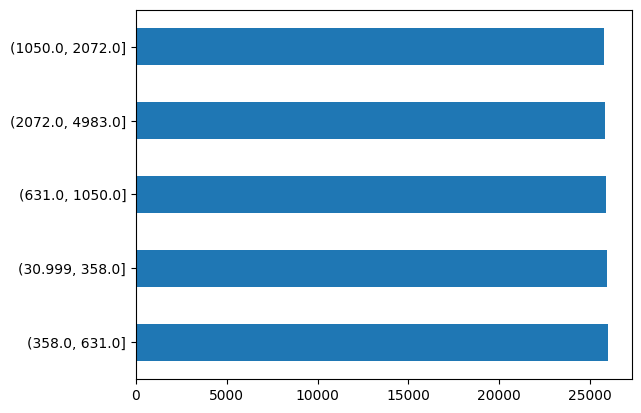

(358.0, 631.0]      26021
(30.999, 358.0]     25955
(631.0, 1050.0]     25899
(2072.0, 4983.0]    25850
(1050.0, 2072.0]    25762
Name: Flight Distance, dtype: int64

In [ ]:
AR_df['Flight Distance_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df["Flight Distance"], q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
AR_df['Departure Delay_qcut'] = pd.qcut(AR_df["Departure Delay"].rank(method='first'), q=5)
AR_df['Departure Delay_qcut'].head()

ID
1      (51795.4, 77692.6]
2    (103589.8, 129487.0]
3        (0.999, 25898.2]
4        (0.999, 25898.2]
5        (0.999, 25898.2]
Name: Departure Delay_qcut, dtype: category
Categories (5, interval[float64, right]): [(0.999, 25898.2] < (25898.2, 51795.4] <
                                           (51795.4, 77692.6] < (77692.6, 103589.8] <
                                           (103589.8, 129487.0]]

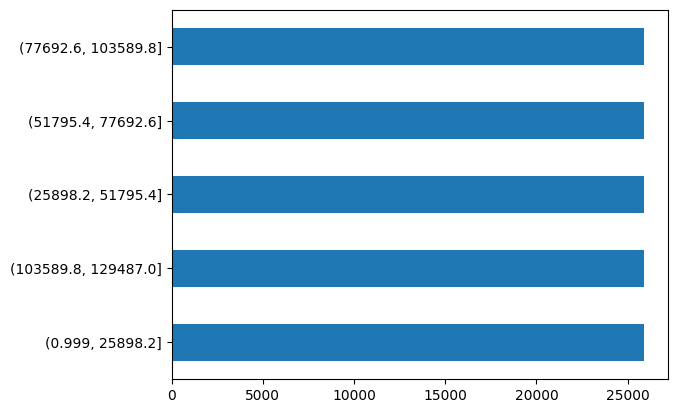

(0.999, 25898.2]        25898
(103589.8, 129487.0]    25898
(25898.2, 51795.4]      25897
(51795.4, 77692.6]      25897
(77692.6, 103589.8]     25897
Name: Departure Delay, dtype: int64

In [ ]:
AR_df['Departure Delay_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df["Departure Delay"].rank(method='first'), q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
AR_df['Arrival Delay_qcut'] = pd.qcut(AR_df["Arrival Delay"].rank(method='first'), q=5)
AR_df['Arrival Delay_qcut'].head()

ID
1     (77692.6, 103589.8]
2    (103589.8, 129487.0]
3        (0.999, 25898.2]
4        (0.999, 25898.2]
5      (51795.4, 77692.6]
Name: Arrival Delay_qcut, dtype: category
Categories (5, interval[float64, right]): [(0.999, 25898.2] < (25898.2, 51795.4] <
                                           (51795.4, 77692.6] < (77692.6, 103589.8] <
                                           (103589.8, 129487.0]]

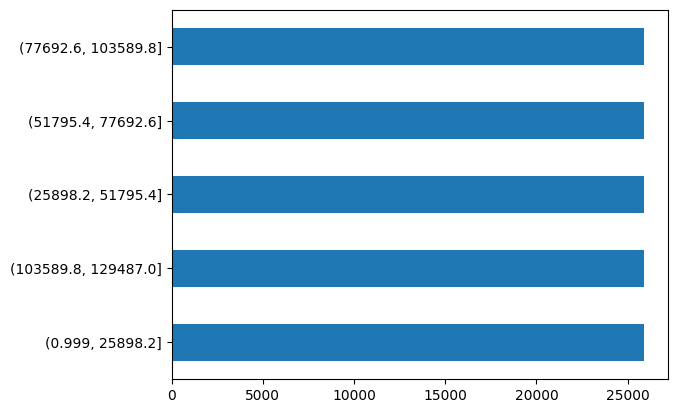

(0.999, 25898.2]        25898
(103589.8, 129487.0]    25898
(25898.2, 51795.4]      25897
(51795.4, 77692.6]      25897
(77692.6, 103589.8]     25897
Name: Arrival Delay, dtype: int64

In [ ]:
AR_df['Arrival Delay_qcut'].value_counts().plot(kind='barh')
plt.show()

qcut_series, qcut_intervals = pd.qcut(AR_df["Arrival Delay"].rank(method='first'), q=5, retbins=True)

qcut_series.value_counts()

In [ ]:
columns = ['Satisfaction',
          'Gender',
          'Age_qcut',
          'Customer Type',
          'Type of Travel',
          'Class',
          'Flight Distance_qcut',
          'Departure Delay_qcut',
          'Arrival Delay_qcut',
          'Departure and Arrival Time Convenience',
          'Ease of Online Booking',
          'Check-in Service',
          'Online Boarding',
          'Gate Location',
          'On-board Service',
          'Seat Comfort',
          'Leg Room Service',
          'Cleanliness',
          'Food and Drink',
          'In-flight Service',
          'In-flight Wifi Service',
          'In-flight Entertainment',
          'Baggage Handling']

not_used_columns = list(set(AR_df.columns.to_list()) - set(columns))

In [ ]:
AR_df = pd.get_dummies(AR_df, columns=columns)

In [ ]:
AR_df.drop(labels=not_used_columns, axis=1, inplace=True)

In [ ]:
AR_df.head()

,Satisfaction_Neutral or Dissatisfied,Satisfaction_Satisfied,Gender_Female,Gender_Male,"Age_qcut_(6.999, 25.0]","Age_qcut_(25.0, 36.0]","Age_qcut_(36.0, 44.0]","Age_qcut_(44.0, 54.0]","Age_qcut_(54.0, 85.0]",Customer Type_First-time,...,In-flight Entertainment_1,In-flight Entertainment_2,In-flight Entertainment_3,In-flight Entertainment_4,In-flight Entertainment_5,Baggage Handling_1,Baggage Handling_2,Baggage Handling_3,Baggage Handling_4,Baggage Handling_5
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
AR_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 1 to 129880
Columns: 114 entries, Satisfaction_Neutral or Dissatisfied to Baggage Handling_5
dtypes: uint8(114)
memory usage: 15.1 MB


In [ ]:
# iterating the columns
for col in AR_df.columns:
    print(col)

In [ ]:
len(AR_df.columns)

114

**Exploratory Data Analysis (EDA) using pandas-profiling after catagorizing dataset**

In [ ]:
pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(AR_df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Apply Apriori algorithm**

In [ ]:
AR_AP = AR_df.copy()

In [ ]:
AR_AP['Satisfaction_Satisfied'].value_counts()

0    73225
1    56262
Name: Satisfaction_Satisfied, dtype: int64

In [ ]:
'''
Filtering only consequents with Satisfaction_Satisfied
'''

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(AR_AP, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Satisfaction_Satisfied\'}'

# results_Satisfaction_Satisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_Satisfaction_Satisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)]


results_Satisfaction_Satisfied.nlargest(n = 10, columns = 'support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
92,(Type of Travel_Business),(Satisfaction_Satisfied),0.690764,0.434499,0.403183,0.583677,1.343333,0.103047,1.358323,0.826499
90,(Customer Type_Returning),(Satisfaction_Satisfied),0.816862,0.434499,0.390572,0.478137,1.100433,0.035646,1.083620,0.498348
1005,"(Customer Type_Returning, Type of Travel_Busin...",(Satisfaction_Satisfied),0.509163,0.434499,0.359488,0.706037,1.624944,0.138257,1.923712,0.783547
94,(Class_Business),(Satisfaction_Satisfied),0.478735,0.434499,0.332466,0.694467,1.598316,0.124456,1.850866,0.718141
1148,"(Type of Travel_Business, Class_Business)",(Satisfaction_Satisfied),0.458154,0.434499,0.330049,0.720388,1.657972,0.130981,2.022446,0.732411
1010,"(Customer Type_Returning, Class_Business)",(Satisfaction_Satisfied),0.407608,0.434499,0.304239,0.746400,1.717840,0.127133,2.229894,0.705401
3319,"(Customer Type_Returning, Class_Business, Type...",(Satisfaction_Satisfied),0.387128,0.434499,0.301822,0.779644,1.794351,0.133615,2.566307,0.722329
85,(Gender_Male),(Satisfaction_Satisfied),0.492590,0.434499,0.216879,0.440283,1.013311,0.002849,1.010333,0.025889
967,"(Type of Travel_Business, Gender_Female)",(Satisfaction_Satisfied),0.352630,0.434499,0.201889,0.572524,1.317663,0.048672,1.322882,0.372400
981,"(Type of Travel_Business, Gender_Male)",(Satisfaction_Satisfied),0.338134,0.434499,0.201294,0.595309,1.370103,0.054375,1.397364,0.408131


In [ ]:
results_Satisfaction_Satisfied.nlargest(n = 10, columns = 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3404,"(Customer Type_Returning, Online Boarding_5, T...",(Satisfaction_Satisfied),0.147343,0.434499,0.147289,0.999633,2.300656,0.083269,1541.312779,0.663035
3376,"(Customer Type_Returning, Type of Travel_Busin...",(Satisfaction_Satisfied),0.102651,0.434499,0.102582,0.999323,2.299942,0.057980,835.181824,0.629863
4173,"(Type of Travel_Business, Class_Business, Onli...",(Satisfaction_Satisfied),0.138076,0.434499,0.137442,0.995414,2.290945,0.077449,123.299860,0.653768
3628,"(Customer Type_Returning, Baggage Handling_5, ...",(Satisfaction_Satisfied),0.135473,0.434499,0.134670,0.994071,2.287855,0.075807,95.384757,0.651118
3460,"(Customer Type_Returning, Seat Comfort_5, Type...",(Satisfaction_Satisfied),0.151691,0.434499,0.150695,0.993432,2.286385,0.084785,86.105166,0.663235
3571,"(Customer Type_Returning, In-flight Service_5,...",(Satisfaction_Satisfied),0.134863,0.434499,0.133967,0.993357,2.286212,0.075369,85.132243,0.650296
3515,"(Customer Type_Returning, Cleanliness_5, Type ...",(Satisfaction_Satisfied),0.119680,0.434499,0.118599,0.990966,2.280708,0.066598,62.596897,0.637881
137,(In-flight Wifi Service_5),(Satisfaction_Satisfied),0.110467,0.434499,0.109378,0.990143,2.278813,0.061380,57.368250,0.630865
3600,"(Customer Type_Returning, In-flight Entertainm...",(Satisfaction_Satisfied),0.144524,0.434499,0.142632,0.986908,2.271369,0.079836,43.195027,0.654299
1185,"(Type of Travel_Business, Online Boarding_5)",(Satisfaction_Satisfied),0.165839,0.434499,0.163584,0.986402,2.270205,0.091527,41.587547,0.670747


In [ ]:
'''
Filtering only consequents with Satisfaction_Neutral or Dissatisfied
'''

#Apriori min support
min_support = 0.1

#Max lenght of apriori n-grams
max_len = 3

frequent_items = apriori(AR_AP, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Satisfaction_Neutral or Dissatisfied\'}'

# results_Satisfaction_Neutral_or_Dissatisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_Satisfaction_Neutral_or_Dissatisfied = rules[rules['consequents'].astype(str).str.contains(target, na=False)]

results_Satisfaction_Neutral_or_Dissatisfied.nlargest(n = 10, columns = 'support')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
13,(Class_Economy),(Satisfaction_Neutral or Dissatisfied),0.448825,0.565501,0.364631,0.812413,1.436626,0.110820,2.316253,0.551412
0,(Gender_Female),(Satisfaction_Neutral or Dissatisfied),0.507410,0.565501,0.289790,0.571115,1.009929,0.002849,1.013091,0.019958
11,(Type of Travel_Personal),(Satisfaction_Neutral or Dissatisfied),0.309236,0.565501,0.277920,0.898731,1.589266,0.103047,4.290559,0.536766
742,"(Customer Type_Returning, Type of Travel_Perso...",(Satisfaction_Neutral or Dissatisfied),0.307699,0.565501,0.276615,0.898978,1.589703,0.102611,4.301056,0.535824
746,"(Customer Type_Returning, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.343857,0.565501,0.274800,0.799169,1.413206,0.080348,2.163507,0.445618
842,"(Type of Travel_Personal, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.253971,0.565501,0.228092,0.898103,1.588154,0.084471,4.264083,0.496413
3186,"(Customer Type_Returning, Type of Travel_Perso...",(Satisfaction_Neutral or Dissatisfied),0.252566,0.565501,0.226919,0.898453,1.588774,0.084092,4.278790,0.495808
72,(In-flight Wifi Service_2),(Satisfaction_Neutral or Dissatisfied),0.248952,0.565501,0.187362,0.752606,1.330866,0.046580,1.756303,0.331017
701,"(Gender_Female, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.228370,0.565501,0.186111,0.814954,1.441119,0.056968,2.348059,0.396686
74,(In-flight Wifi Service_3),(Satisfaction_Neutral or Dissatisfied),0.247801,0.565501,0.185401,0.748185,1.323048,0.045269,1.725467,0.324608


In [ ]:
results_Satisfaction_Neutral_or_Dissatisfied.nlargest(n = 10, columns = 'confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
881,"(In-flight Wifi Service_2, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.123758,0.565501,0.121201,0.979345,1.731819,0.051216,21.035800,0.482255
887,"(In-flight Wifi Service_3, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.124190,0.565501,0.121078,0.974939,1.724028,0.050848,17.337920,0.479514
3200,"(In-flight Wifi Service_2, Online Boarding_2, ...",(Satisfaction_Neutral or Dissatisfied),0.105246,0.565501,0.102365,0.972630,1.719944,0.042849,15.874947,0.467822
904,"(Online Boarding_2, Ease of Online Booking_2)",(Satisfaction_Neutral or Dissatisfied),0.118174,0.565501,0.114228,0.966606,1.709291,0.047400,13.011168,0.470572
927,"(In-flight Wifi Service_2, Online Boarding_2)",(Satisfaction_Neutral or Dissatisfied),0.129588,0.565501,0.124707,0.962336,1.701741,0.051425,11.536229,0.473760
3213,"(Online Boarding_3, In-flight Wifi Service_3, ...",(Satisfaction_Neutral or Dissatisfied),0.110768,0.565501,0.106520,0.961654,1.700535,0.043881,11.330950,0.463265
932,"(Online Boarding_3, In-flight Wifi Service_3)",(Satisfaction_Neutral or Dissatisfied),0.140385,0.565501,0.134098,0.955221,1.689159,0.054711,9.703104,0.474619
865,"(Online Boarding_3, Class_Economy)",(Satisfaction_Neutral or Dissatisfied),0.116220,0.565501,0.109996,0.946442,1.673635,0.044273,8.112629,0.455428
915,"(Online Boarding_3, Ease of Online Booking_3)",(Satisfaction_Neutral or Dissatisfied),0.127997,0.565501,0.120800,0.943767,1.668905,0.048417,7.726813,0.459637
853,"(Class_Economy, Ease of Online Booking_2)",(Satisfaction_Neutral or Dissatisfied),0.118244,0.565501,0.109285,0.924237,1.634370,0.042418,5.735015,0.440193
